In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

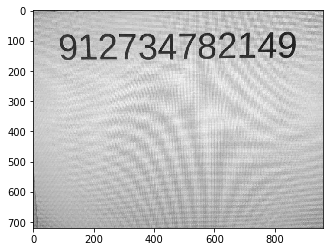

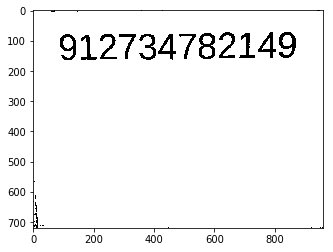

In [2]:
image = cv2.imread('test_4.jpg')
image_color = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_grayscale = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(image_grayscale, cmap='gray')
plt.show()

threshold = 110
image_black_white = np.vectorize(lambda x: 0 if x < threshold else 255)(image_grayscale)
plt.imshow(image_black_white, cmap='gray')
plt.show()

In [3]:
def floodfill(mat, y, x, c1, c2):
    stack = [(y,x)]
    while len(stack) > 0:
        ny, nx = stack.pop()
        if ny >= len(mat) or ny < 0 or nx >= len(mat[ny]) or nx < 0:
            continue
        if mat[ny][nx] != c1:
            continue
        mat[ny][nx] = c2
        stack.append((ny + 1, nx))
        stack.append((ny - 1, nx))
        stack.append((ny, nx + 1))
        stack.append((ny, nx - 2))
    
def check_border(mat, y, x):
    height, width = mat.shape
    if mat[y][x] == 0:
        return False
    if y == 0 or x == 0 or y == height - 1 or x == width - 1:
        return True
    if 0 in [mat[y+1][x], mat[y-1][x], mat[y][x+1], mat[y][x-1]]:
        return True
    return False

def generate_chain_code(mat, y, x):
    cluster_id = mat[y][x]
    dx = [0, 1, 1, 1, 0, -1, -1, -1]
    dy = [-1, -1, 0, 1, 1, 1, 0, -1]

    result = []
    pos = (x,y)
    while mat[pos[1]][pos[0]] == cluster_id:
        mat[pos[1]][pos[0]] *= -1
        old_pos = pos
        for d, temp in enumerate(zip(dx, dy)):
            ix, iy = temp
            nx, ny = pos[0] + ix, pos[1] + iy
            if nx >= 0 and ny >= 0 and ny < len(mat) and nx < len(mat[ny]) and mat[ny][nx] == cluster_id and check_border(mat, ny, nx):
                result.append(d)
                pos = (nx, ny)
                break
        if pos == old_pos:
            break
    return result

def stretch_chain_code(chain_code, len_dest):
    ret = []
    if len(chain_code) < len_dest:
        scale =  len_dest / len(chain_code)
        for i in range(len_dest):
            ret += [chain_code[min(round(i/scale),len(chain_code)-1)]]
    else:
        scale = len(chain_code) / len_dest
        for i in range(len_dest):
            i_from = round(i*scale)
            i_to = min(round(i_from + scale), len(chain_code))
            # ret += [max(set(chain_code[i_from:i_to]), key=chain_code[i_from:i_to].count)]
            ret += [int(round(np.average(chain_code[i_from:i_to])))]
    return ret

def generate_all_chain_code(mat):
    height, width = mat.shape

    cluster = 0
    for y in range(height):
        for x in range(width):
            if mat[y][x] == -1:
                cluster += 1
                floodfill(mat, y, x, -1, cluster)
                
    chain_codes = {}
    for y in range(height):
        for x in range(width):
            if mat[y][x] > 0 and abs(mat[y][x]) not in chain_codes and check_border(mat, y, x):
                cluster_id = mat[y][x]
                chain_code = generate_chain_code(mat, y, x)
                chain_codes[cluster_id] = chain_code

    return list(chain_codes.values())

def get_all_chain_codes_in_image(image):
    threshold = 110
    image_mat = np.vectorize(lambda x: -1 if x < threshold else 0)(image)
    return generate_all_chain_code(image_mat)
    
def print_mat(mat):
    mat_str = np.vectorize(lambda x: str(x))(mat)
    print('\n'.join(["".join(row) for row in mat_str]))
    
def draw_chain_code(chain_code):
    dx = [0, 1, 1, 1, 0, -1, -1, -1]
    dy = [-1, -1, 0, 1, 1, 1, 0, -1]
    minx = 0
    maxx = 0
    miny = 0
    maxy = 0
    
    pos = (0,0)
    for direction in chain_code:
        pos = pos[0] + dx[direction], pos[1] + dy[direction]
        minx = min(minx, pos[0])
        maxx = max(maxx, pos[0])
        miny = min(miny, pos[1])
        maxy = max(maxy, pos[1])
    
    matrix = np.ones((maxy-miny+1, maxx-minx+1)) * 255
    pos = (0,0)
    matrix[-miny][-minx] = 0
    for direction in chain_code:
        pos = pos[0] + dx[direction], pos[1] + dy[direction]
        matrix[pos[1] - miny][pos[0] - minx] = 0
        
    plt.imshow(matrix * 255, cmap='gray')
    plt.show()

In [4]:
img_chain_codes = get_all_chain_codes_in_image(image_grayscale)

## Import Data MNIST

In [5]:
import pandas
import scipy 

In [6]:
def preprocess_mnist(mat):
    threshold = 110
    return np.vectorize(lambda x: 255 - x)(mat)

In [7]:
images = []
label = []
data = pandas.read_csv("train.csv", nrows= 1000)

for i in range(len(data.values)):    
    curr_image = data.values[i][1:].reshape((28,28))
    curr_image = preprocess_mnist(curr_image)
    curr_label = data.values[i][0]
    images.append(curr_image)
    label.append(curr_label)

In [8]:
chain_codes = []
for i in range(len(images)):
    image_chain_codes = get_all_chain_codes_in_image(images[i])
    max_length = 0
    max_idx = 0
    for idx in range(len(image_chain_codes)):
        if len(image_chain_codes[idx]) > max_length:
            max_length = len(image_chain_codes[idx])
            max_idx = idx
    chain_codes.append(image_chain_codes[max_idx])
# chain_codes

In [9]:
feature_chain_code = []
for i in range(len(chain_codes)):
    stretched_chain_code = stretch_chain_code(chain_codes[i], 100)
    feature_chain_code.append(stretched_chain_code)

## WUSH

180


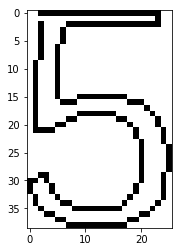

180


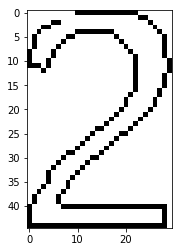

180


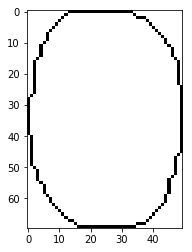

180


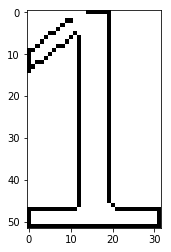

180


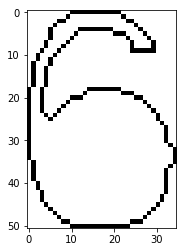

180


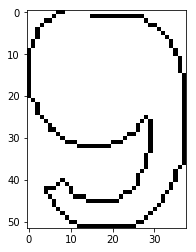

180


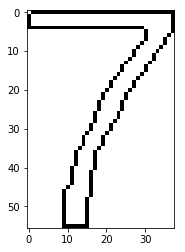

180


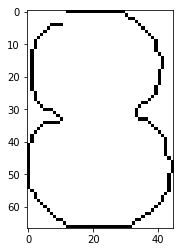

180


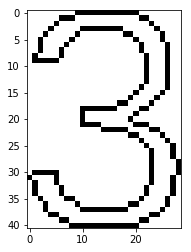

180


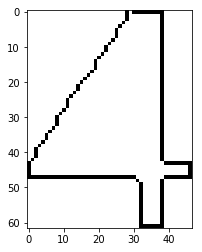

In [10]:
import glob

data_x = []
data_y = []
for file in glob.glob('training/*'):
    image = cv2.imread(file)
    image_color = cv2.cvtColor(image, cv2.COLOR_BGRA2RGB)
    image_grayscale = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    chain_codes = get_all_chain_codes_in_image(image_grayscale)
    chain_code = max(map(lambda x: (len(x), x), chain_codes))[1]
    chain_code = stretch_chain_code(chain_code, 180)
    
    label = file[9]
    data_x.append(chain_code)
    data_y.append(int(label))
    
for d in data_x:
    print(len(d))
    draw_chain_code(d)

## Classifier

In [11]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1, metric= 'manhattan')
knn.fit(data_x, data_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

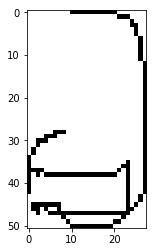

9


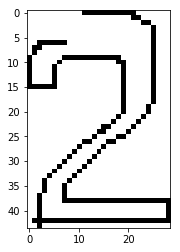

2


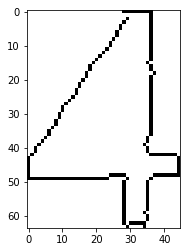

4


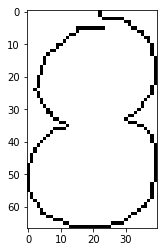

0


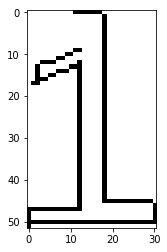

1


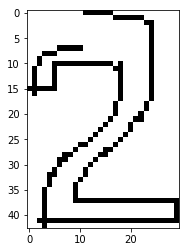

2


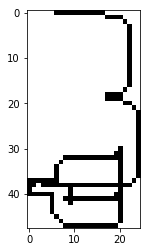

3


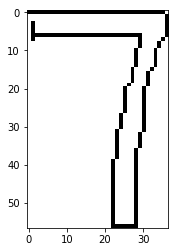

7


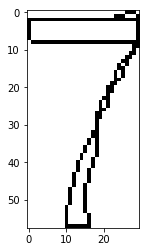

9


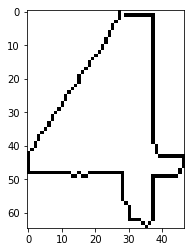

4


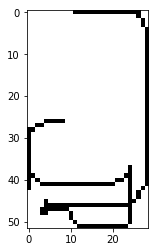

9


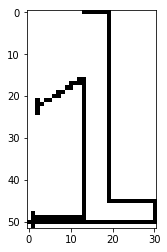

1


In [12]:
data_to_predict = list(filter(lambda x: len(x) > 40, img_chain_codes))
data_to_predict = map(lambda y: stretch_chain_code(y, 180), data_to_predict)
data_to_predict = list(data_to_predict)

predicted = knn.predict(data_to_predict)
for test, result in zip(data_to_predict, predicted):
    draw_chain_code(test)
    print(result)